# HW07: Expectation Maximization Clustering
## Sina Dadmand
### December 27, 2021

In [93]:
import numpy as np
import scipy.spatial as spa
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
from scipy.stats import stats


In [ ]:
np.random.seed(521)
# sample size
N = 300
# cluster count
K = 5
# generate random samples
X1 = np.random.multivariate_normal(np.array([+2.5, +2.5]), np.array([[0.8, -0.6], [-0.6, 0.8]]), 50)
X2 = np.random.multivariate_normal(np.array([-2.5, +2.5]), np.array([[0.8, 0.6], [0.6, 0.8]]), 50)
X3 = np.random.multivariate_normal(np.array([-2.5, -2.5]), np.array([[0.8, -0.6], [-0.6, 0.8]]), 50)
X4 = np.random.multivariate_normal(np.array([+2.5, -2.5]), np.array([[0.8, 0.6], [0.6, 0.8]]), 50)
X5 = np.random.multivariate_normal(np.array([0, 0]), np.array([[1.6, 0.0], [0.0, 1.6]]), 100)
X = np.vstack((X1, X2, X3, X4, X5))

cluster_colors = np.array(["r", "g", "b", "purple", "pink"]) # To be used in the future.
plt.plot(X[:,0], X[:,1], "k.", markersize = 10)
plt.xlabel("x1");plt.ylabel("x2");plt.title("Dataset")
plt.show()

In [86]:
centroids = np.genfromtxt('hw07_initial_centroids.csv', delimiter = ",")
D = spa.distance_matrix(centroids, X)
memberships = np.argmin(D, axis = 0)



# Parameter initialization

In [87]:
# calculate prior probabilities
class_priors = [np.mean(memberships == (c)) for c in range(K)]
class_sizes = [X[memberships == c].shape[0] for c in range(K)]
# calculate sample means
m = [np.mean(X[memberships == (c)],axis=0) for c in range(K)]
# calculate sample covarience matrices.
S = [((X[memberships == c] - m[c]).T@(X[memberships == c] - m[c]))/class_sizes[c] for c in range(K)]

# Expectation Maximization Clustring

In [88]:
iterations = 100

for i in range(iterations):
    # E-part
    h = np.array([class_priors[c]*multivariate_normal.pdf(X, m[c], S[c]) for c in range(K)]).T
    hh = np.array([h[:,c] / np.sum(h,axis=1) for c in range(K)]).T
            
    # M-part
    class_priors = [np.sum(hh[:,c])/N for c in range(K)]
    m = [hh[:,c]@X / np.sum(hh[:,c]) for c in range(K)]
    S = [(hh[:,c]*(X - m[c]).T@(X - m[c]))/np.sum(hh[:,c]) for c in range(K)]
    memberships = np.argmax(hh,axis=1)

# Show mean of members.
print('Mean of each gaussian:\n\t   [,1] \t[,2] ')
for c in range(K): 
    print('[,',c+1,']',m[c])

Mean of each gaussian:
	   [,1] 	[,2] 
[, 1 ] [-2.44390023 -2.54539395]
[, 2 ] [2.50354332 2.5113486 ]
[, 3 ] [ 2.56726404 -2.55477251]
[, 4 ] [0.12794696 0.15595794]
[, 5 ] [-2.41465294  2.48556153]


In [100]:
def create_ellipse(x, y, m_, S_, ax, facecolor='none', edgecolor='black',linestyle = "-"):
    n_std=1.5
    cov = np.cov(x, y)  
    
    # Get the eigenvalues of given dataset.
    ell_radius_x = np.sqrt(1 + cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1]))
    ell_radius_y = np.sqrt(1 - cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1]))
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,facecolor=facecolor,
                      edgecolor='black',linestyle = linestyle)

    # Stdandard deviations
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = m_[0]
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = m_[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    
    return ax.add_patch(ellipse)


array([[ 1.62337367, -0.07234978],
       [-0.07234978,  1.67670825]])

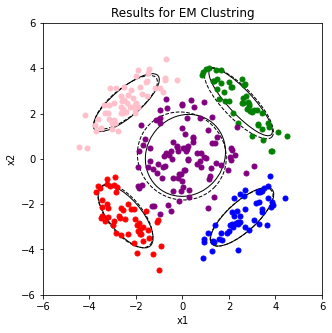

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

# Results with EM clustring with K-means initializaitons
for c in range(K):
    x,y = X[memberships==c][:,0],X[memberships==c][:,1]
    create_ellipse(x, y, m[c], S[c], ax)
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,color = cluster_colors[c])

# Original Gaussians
x,y = X1[:,0],X1[:,1];m1 = [np.mean(x),np.mean(y)];
create_ellipse(x, y,m1,S[0], ax,edgecolor='black', linestyle='--')
x,y = X2[:,0],X2[:,1];m2 = [np.mean(x),np.mean(y)];
create_ellipse(x, y,m2,S[0], ax,edgecolor='black', linestyle='--')
x,y = X3[:,0],X3[:,1];m3 = [np.mean(x),np.mean(y)];
create_ellipse(x, y,m3,S[0], ax,edgecolor='black', linestyle='--')
x,y = X4[:,0],X4[:,1];m4 = [np.mean(x),np.mean(y)];
create_ellipse(x, y,m4,S[0], ax,edgecolor='black', linestyle='--')
x,y = X5[:,0],X5[:,1];m5 = [np.mean(x),np.mean(y)];
create_ellipse(x, y,m5,S[0], ax,edgecolor='black', linestyle='--')

ax.set(xlim=(-6, 6), ylim=(-6, 6))
plt.xlabel("x1");plt.ylabel("x2")
plt.title("Results for EM Clustring")
plt.show()

ValueError: the input matrix must be positive semidefinite

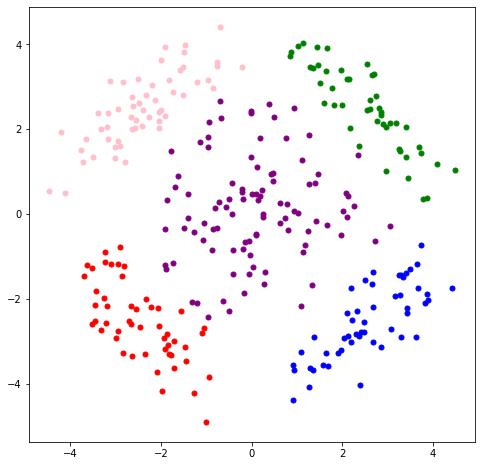

In [99]:
#cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                            #   "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

plt.figure(figsize=(8, 8))
for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])

x1_interval = np.arange(-5, +5, 0.05)
x2_interval = np.arange(-5, +5, 0.05)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
coordinates = np.empty(x1_grid.shape + (2,))                
coordinates[:, :, 0] = x1_grid
coordinates[:, :, 1] = x2_grid 


for i in range(K):
    initial_pdf = multivariate_normal(m[i], S[i])
    final_pdf = multivariate_normal(centroids[i], [i])
    plt.contour(x1_grid, x2_grid, initial_pdf.pdf(coordinates), linestyles='dashed', levels=[0.05])
    plt.contour(x1_grid, x2_grid, final_pdf.pdf(coordinates), levels=[0.05])